# stats_plot

> Generate plots for dataset

In [ ]:
path_input = "../data/test/parquet"
path_output = "../outs"
depth = 2
exclude = "trades"
resample_interval = "hour"
resample_amount = 1
start_time = "21_3_5-0_0_0"
end_time = "21_3_10-0_0_0"
publish = False

In [ ]:
import datetime
import os

import dask.dataframe as dd

from rlmm.utils import *

In [ ]:
if not os.path.exists(os.path.abspath(path_input)):
    raise ValueError(f"Path does not exist: {path_input}")

In [ ]:
if not os.path.exists(os.path.abspath(path_output)):
    raise ValueError(f"Path does not exist: {path_output}")

In [ ]:
rs_code = get_resample_code(resample_interval, resample_amount)
start_ts = datetime.datetime.strptime(start_time, "%y_%m_%d-%H_%M_%S")
end_ts = datetime.datetime.strptime(end_time, "%y_%m_%d-%H_%M_%S")

In [ ]:
folders = walk_folders(path_input=path_input, depth=depth, exclude=exclude.split(","))

print(f"Folders: {folders}")

Folders: ['../data/test/parquet/book_snapshot_25/ETHUSDT']


Reading ../data/test/parquet/book_snapshot_25/ETHUSDT...
Calculating order book columns...


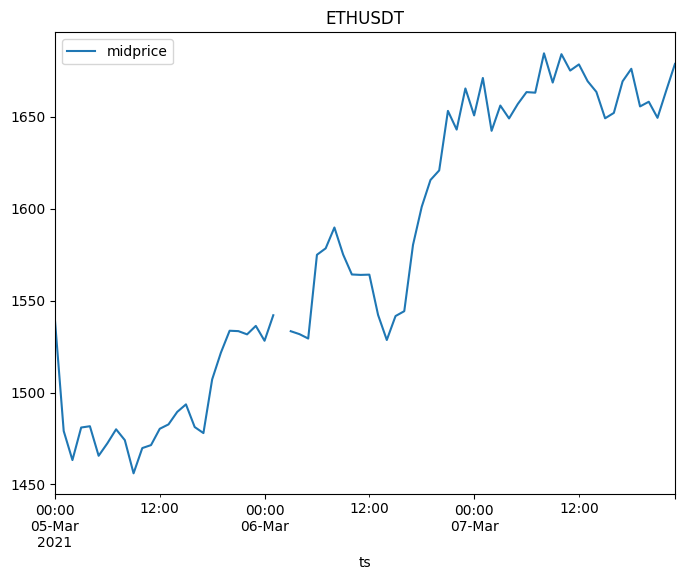

In [ ]:
for folder in folders:
    print(f"Reading {folder}...")
    df = dd.read_parquet(folder).compute()
    df = df[(df.index >= start_ts) & (df.index <= end_ts)]
    df = df.resample(rs_code).first()

    if "book" in folder:
        print("Calculating order book columns...")
        df["midprice"] = (df["bids[0].price"] + df["asks[0].price"]) / 2
        cols = ["midprice"]
        df = df[cols]

    title = folder.split("/")[-1]
    # Figsize should fit in research paper
    figsize = (8, 6)
    plot = df.plot(title=title, figsize=figsize)

    if publish and path_output:
        ts = datetime.datetime.now().strftime("%y_%m_%d-%H_%M_%S")
        plot.get_figure().savefig(
            f'{path_output}/plot_{folder.split("/")[-1]}_{ts}.png'
        )